In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = np.load('data.npz')

In [4]:
x_train, x_test, y_train, y_test = data['x_train'], data['x_test'], data['y_train'], data['y_test']
print(x_train.shape, x_test.shape)

(520, 13) (130, 13)


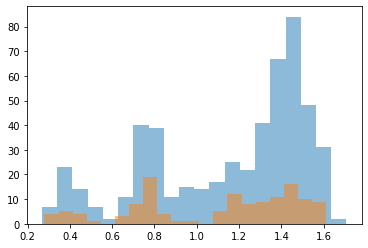

In [5]:
plt.hist(y_train, bins=20, alpha=0.5)
plt.hist(y_test, bins=20, alpha=0.5)
plt.show()

In [6]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
clf = KernelRidge(alpha=1.0)
clf.fit(x_train, y_train)

KernelRidge(alpha=1.0)

In [7]:
y_pred = clf.predict(x_test)

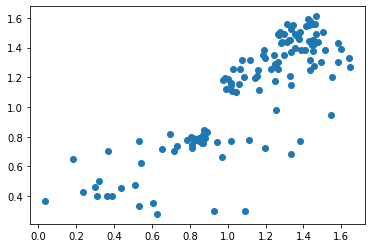

In [8]:
plt.scatter(y_pred, y_test)
plt.show()

In [10]:
# Do jackknife+
models = []
for i in range(len(x_train)):
    models.append(KernelRidge(alpha=1.0))
    cur_x = np.concatenate([x_train[:i], x_train[(i+1):]], axis=0)
    cur_y = np.concatenate([y_train[:i], y_train[(i+1):]], axis=0)
    models[-1].fit(cur_x, cur_y)

In [30]:
resolution = 200


quantiles = np.zeros((len(x_test), resolution))

for j in range(len(x_test)):
    pred_train = np.zeros(len(x_train))
    pred_test = np.zeros(len(x_train))
    ys = np.linspace(0, 2.0, resolution)
    for i in range(len(x_train)):
        pred_train[i] = models[i].predict(x_train[i:i+1]) - y_train[i:i+1]
        pred_test[i] = models[i].predict(x_test[j:j+1])
#     plt.hist(pred_train)
#     plt.hist(pred_test)
#     plt.show()
#     print(pred_train.shape)
    ys = np.tile(np.reshape(ys, [-1, 1]), [1, len(x_train)])
    pred_test = np.tile(np.reshape(pred_test, [1, -1]), [resolution, 1])
    pred_train = np.tile(np.reshape(pred_train, [1, -1]), [resolution, 1])
    # print(pred_train.shape, pred_test.shape, ys.shape)
    quantile = np.mean(((pred_test - ys) < pred_train).astype(np.float), axis=1)
#     plt.plot(ys, quantile)
#     plt.axvline(y_test[j])
#     plt.show()
    quantiles[j] = quantile

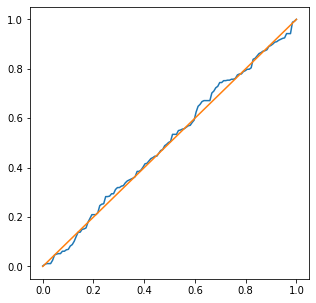

In [42]:

discrete_y = (y_test / 2.0 * resolution).astype(np.int)
plt.figure(figsize=(5, 5))
plt.plot(np.linspace(0, 1, len(y_test)), np.sort(quantiles[range(len(x_test)), discrete_y]))
plt.plot([0, 1], [0, 1])
plt.show()

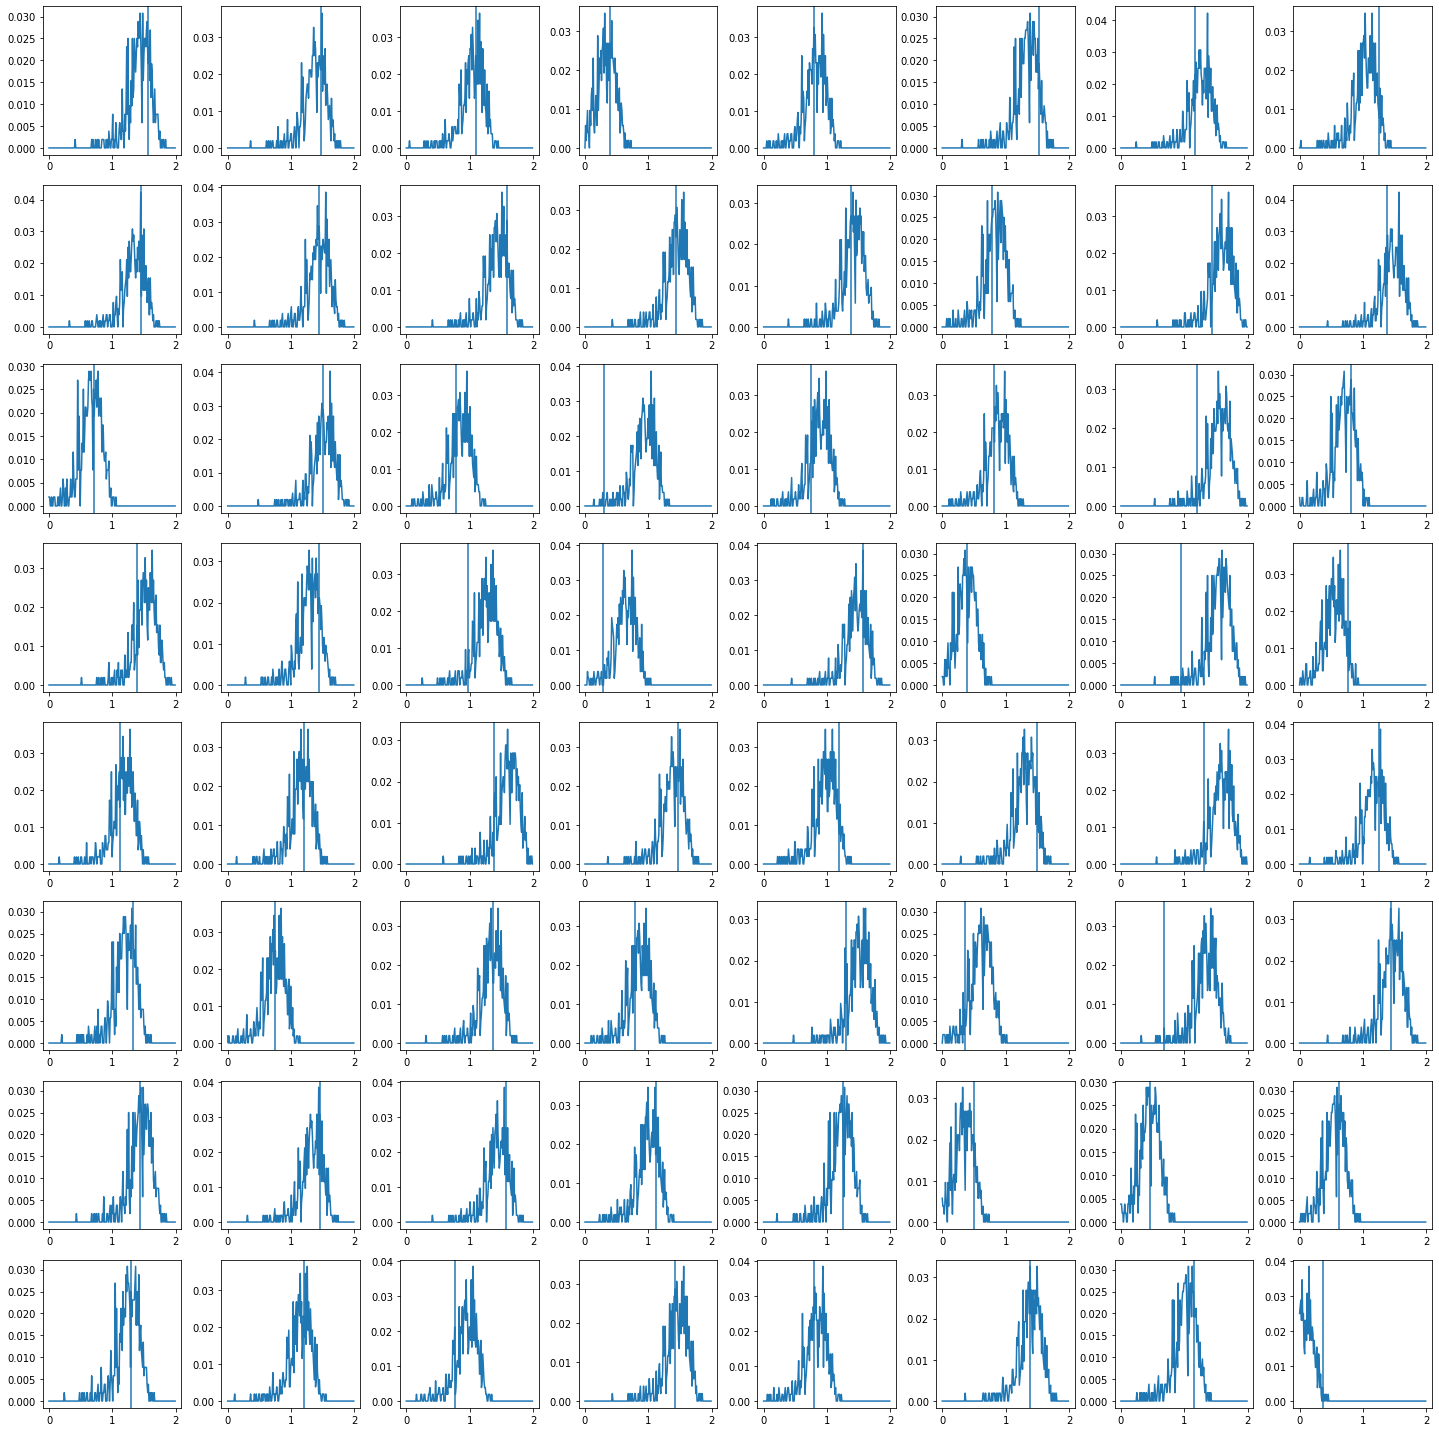

In [51]:
plt.figure(figsize=(20, 20))
for i in range(64):
    plt.subplot(8, 8, i+1)
    
    plt.plot(np.linspace(0, 2.0, resolution)[:-1], quantiles[i, 1:] - quantiles[i, :-1])
    plt.axvline(y_test[i])
plt.tight_layout()
plt.show()

In [49]:
print(quantiles.shape)

(130, 200)
